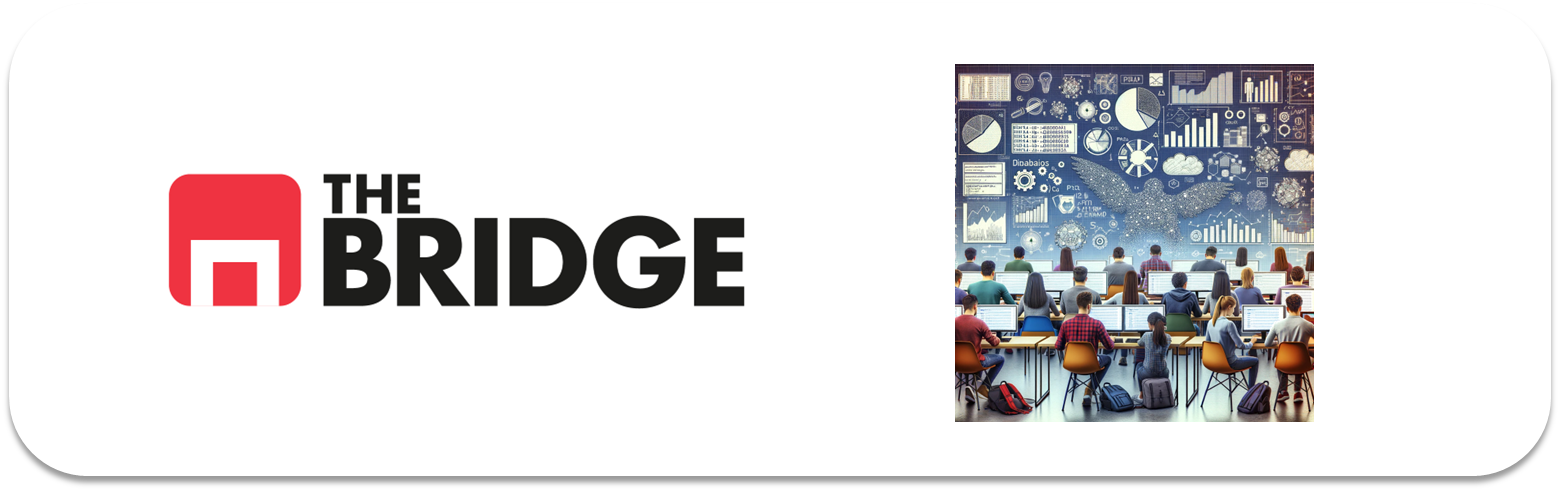

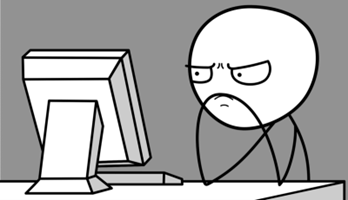

Para ejercitarte y afianzar lo aprendido sobre **Proceso de Datos**, como primera etapa de ML, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

### Ejercicio 1

Carga el dataset de advertising que encontrarás en la carpeta de datos. Muestra su información general. ¿Qué te llama la atención? ¿Tendremos que limpiar alguna variable?

In [2]:
adverts = pd.read_csv('./data/advertising_ml.csv')

In [21]:
adverts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Daily Time Spent on Site  1000 non-null   float64       
 1   Age                       1000 non-null   object        
 2   Area Income               1000 non-null   float64       
 3   Daily Internet Usage      1000 non-null   float64       
 4   Ad Topic Line             1000 non-null   object        
 5   City                      1000 non-null   object        
 6   Male                      1000 non-null   int64         
 7   Country                   1000 non-null   object        
 8   Timestamp                 1000 non-null   datetime64[ns]
 9   Clicked on Ad             1000 non-null   int64         
 10  age_clean                 1000 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(3), object(4)
memory usage: 86.1+ KB


In [20]:
adverts.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,age_clean
0,68.95,35 years,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,35
1,80.23,31 years,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,31
2,69.47,26 years,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0,26
3,74.15,29 years,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0,29
4,68.37,35 años,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0,35


### Ejercicio 2

Tenemos que entender el problema antes de seguir. Nos dicen que la compañía "QuickRespond" quiere poder generar un modelo que a partir de datos como los del dataset para poder dirigir mejor su campaña de anuncios. Hablando con ellos llegamos a la conclusión de que queremos un modelo para poder predecir si un usuario pulsará en el link de un anuncio o no. ¿Qué tipo de problemas estamos tratando?¿Y de que tipo de aprendizaje?¿Existe una variable target que puedas identificar rapidamente?

**Objetivo de negocio [X]**:
- improve targeting of advertising campaign
- be able to predict whether a user will click on an ad or not

**Objetivo tecnico [X]**:  
- build predictive model to predict whether a user will click on an ad based on the provided features

**Tipo de modelado (supervisado, no supervisado) [X]**:  
- SUPERVISED
- we have labeled data of target variable 'Clicked on Ad'

**Features []**:  
- Need checking in EDA

**Target, si hay [X]**:  
- 'Clicked on Ad'
- Should be binary

**Tipo de problema (clasificación, regresión, etc) [X]**:  
- Classification: Binary classification

**Métrica de Evaluacion [/]**:  
- As classification: accuracy, precision, recall, F1-score, AUC-ROC

**Separación Train-Test [/]**:
- 80/20 split

### Ejercicio 3

Volvamos ya a los datos. Intenta dar una definicón de cada columna, obten su cardinalidad y en función de esta y del tipo de variable de pandas, clasifícalas en categóricas y numéricas.

In [9]:
def cardinality_types(df,categorical_threshold = 10, continuous_threshold = 30):
    # Prepare dataset with cardinalities, % variation of cardinality and data types
    df_temp = pd.DataFrame([df.nunique(), df.nunique()/len(df) * 100, df.dtypes]) # Cardinality and percentage variation of cardinality
    df_temp = df_temp.T # Use transpose to convert the the columns into rows
    df_temp = df_temp.rename(columns = {0: "Card", 1: "%_Card", 2: "dType"}) # rename the transposed columns

    # correction for when there is only 1 value
    df_temp.loc[df_temp.Card == 1, "%_Card"] = 0.00

    # create a column for variable types. Initialise all variables as categorical and adapt the filters to the dataset
    df_temp["variable_type"] = "Categorical"
    df_temp.loc[df_temp["Card"] == 2, "variable_type"] = "Binary"
    df_temp.loc[df_temp["Card"] >= categorical_threshold, "variable_type"] = "Numerical discrete"
    df_temp.loc[df_temp["%_Card"] >= continuous_threshold, "variable_type"] = "Numerical continuous"

    return df_temp

In [37]:
card_types.index

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad', 'age_clean'],
      dtype='object')

In [43]:
card_types = cardinality_types(adverts)

In [49]:
card_types

,Card,%_Card,dType,variable_type
Daily Time Spent on Site,900,90.0,float64,Numerical continuous
Age,83,8.3,object,Numerical discrete
Area Income,1000,100.0,float64,Numerical continuous
Daily Internet Usage,966,96.6,float64,Numerical continuous
Ad Topic Line,1000,100.0,object,Categorical
City,969,96.9,object,Categorical
Male,2,0.2,int64,Binary
Country,237,23.7,object,Categorical
Timestamp,1000,100.0,datetime64[ns],Numerical continuous
Clicked on Ad,2,0.2,int64,Binary


In [53]:
numeric_cols = ['Daily Time Spent on Site','Area Income','Daily Internet Usage','age_clean','Timestamp']
categoric_cols = ['Ad Topic Line','City','Country','Clicked on Ad','Male']

In [48]:
card_types.loc['Ad Topic Line', 'variable_type'] = 'Categorical'
card_types.loc['City', 'variable_type'] = 'Categorical'
card_types.loc['Country', 'variable_type'] = 'Categorical'

### Ejercicio 4

Limpia las columnas que necesiten ser limpiadas, no completes nulos (porque asignar valores a nulos sólo puedes hacerlo primero con el train, ya explicaremos con detalle por qué). 

In [34]:
adverts['age_clean'] = adverts['Age'].str.extract(r'(\d+)').astype('int64')

In [19]:
adverts['Timestamp'] = pd.to_datetime(adverts['Timestamp']) 

In [ ]:
adverts['Ad Topic Line'] = adverts['Ad Topic Line'].astype('object')
adverts['City'] = adverts['City'].astype('object')
adverts['Country'] = adverts['Country'].astype('object')

### Ejercicio 5

Divide el datset en train y test, empleando sklearn para ello tal y como hemos hecho en el workout. Usa la regla del 80-20

In [58]:
train_set, test_set = train_test_split(adverts, test_size=0.2, random_state=42)

In [59]:
len(test_set)

200

In [60]:
len(train_set)

800

### Ejercicio 6

Haz un pequeño análisis univariante de las columnas numéricas (muestra sus histogramas)

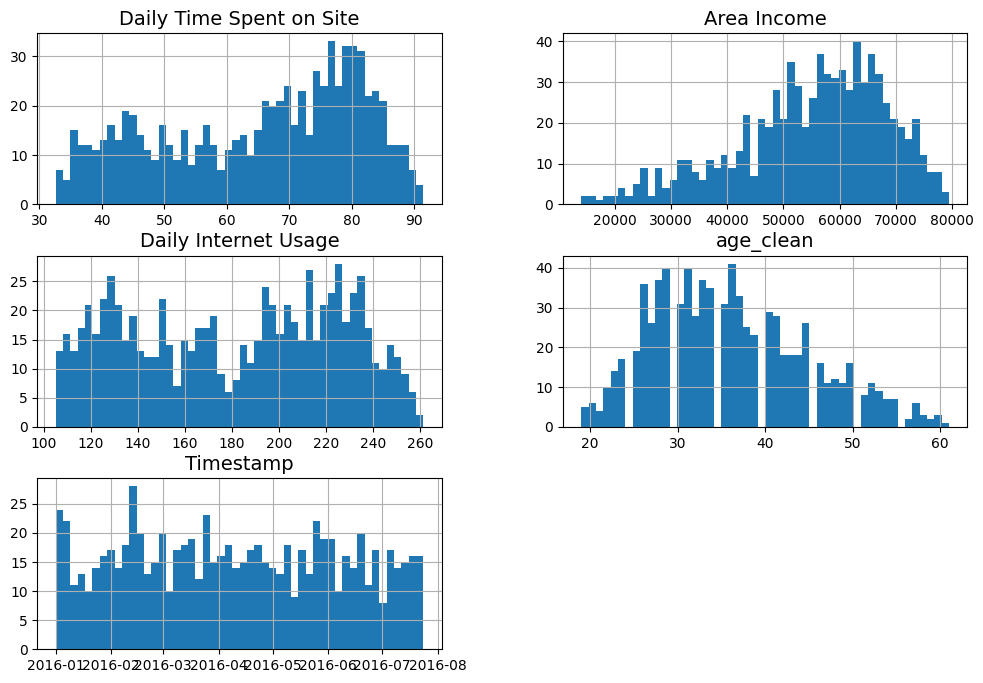

In [61]:
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

train_set[numeric_cols].hist(bins=50, figsize=(12, 8))
plt.show()

In [55]:
def pinta_distribucion_categoricas(df, columnas_categoricas, relativa=False, mostrar_valores=False):
    num_columnas = len(columnas_categoricas)
    num_filas = (num_columnas // 2) + (num_columnas % 2)

    fig, axes = plt.subplots(num_filas, 2, figsize=(15, 5 * num_filas))
    axes = axes.flatten() 

    for i, col in enumerate(columnas_categoricas):
        ax = axes[i]
        if relativa:
            total = df[col].value_counts().sum()
            serie = df[col].value_counts().apply(lambda x: (x / total)*100)
            sns.barplot(x=serie.index, y=serie, ax=ax, palette='viridis', hue = serie.index, legend = False)
            ax.set_ylabel('Frecuencia Relativa')
        else:
            serie = df[col].value_counts()
            sns.barplot(x=serie.index, y=serie, ax=ax, palette='viridis', hue = serie.index, legend = False)
            ax.set_ylabel('Frecuencia')

        ax.set_title(f'Distribución de {col}')
        ax.set_xlabel('')
        ax.tick_params(axis='x', rotation=45)

        if mostrar_valores:
            for p in ax.patches:
                height = p.get_height()
                ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height), 
                            ha='center', va='center', xytext=(0, 9), textcoords='offset points')

    for j in range(i + 1, num_filas * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

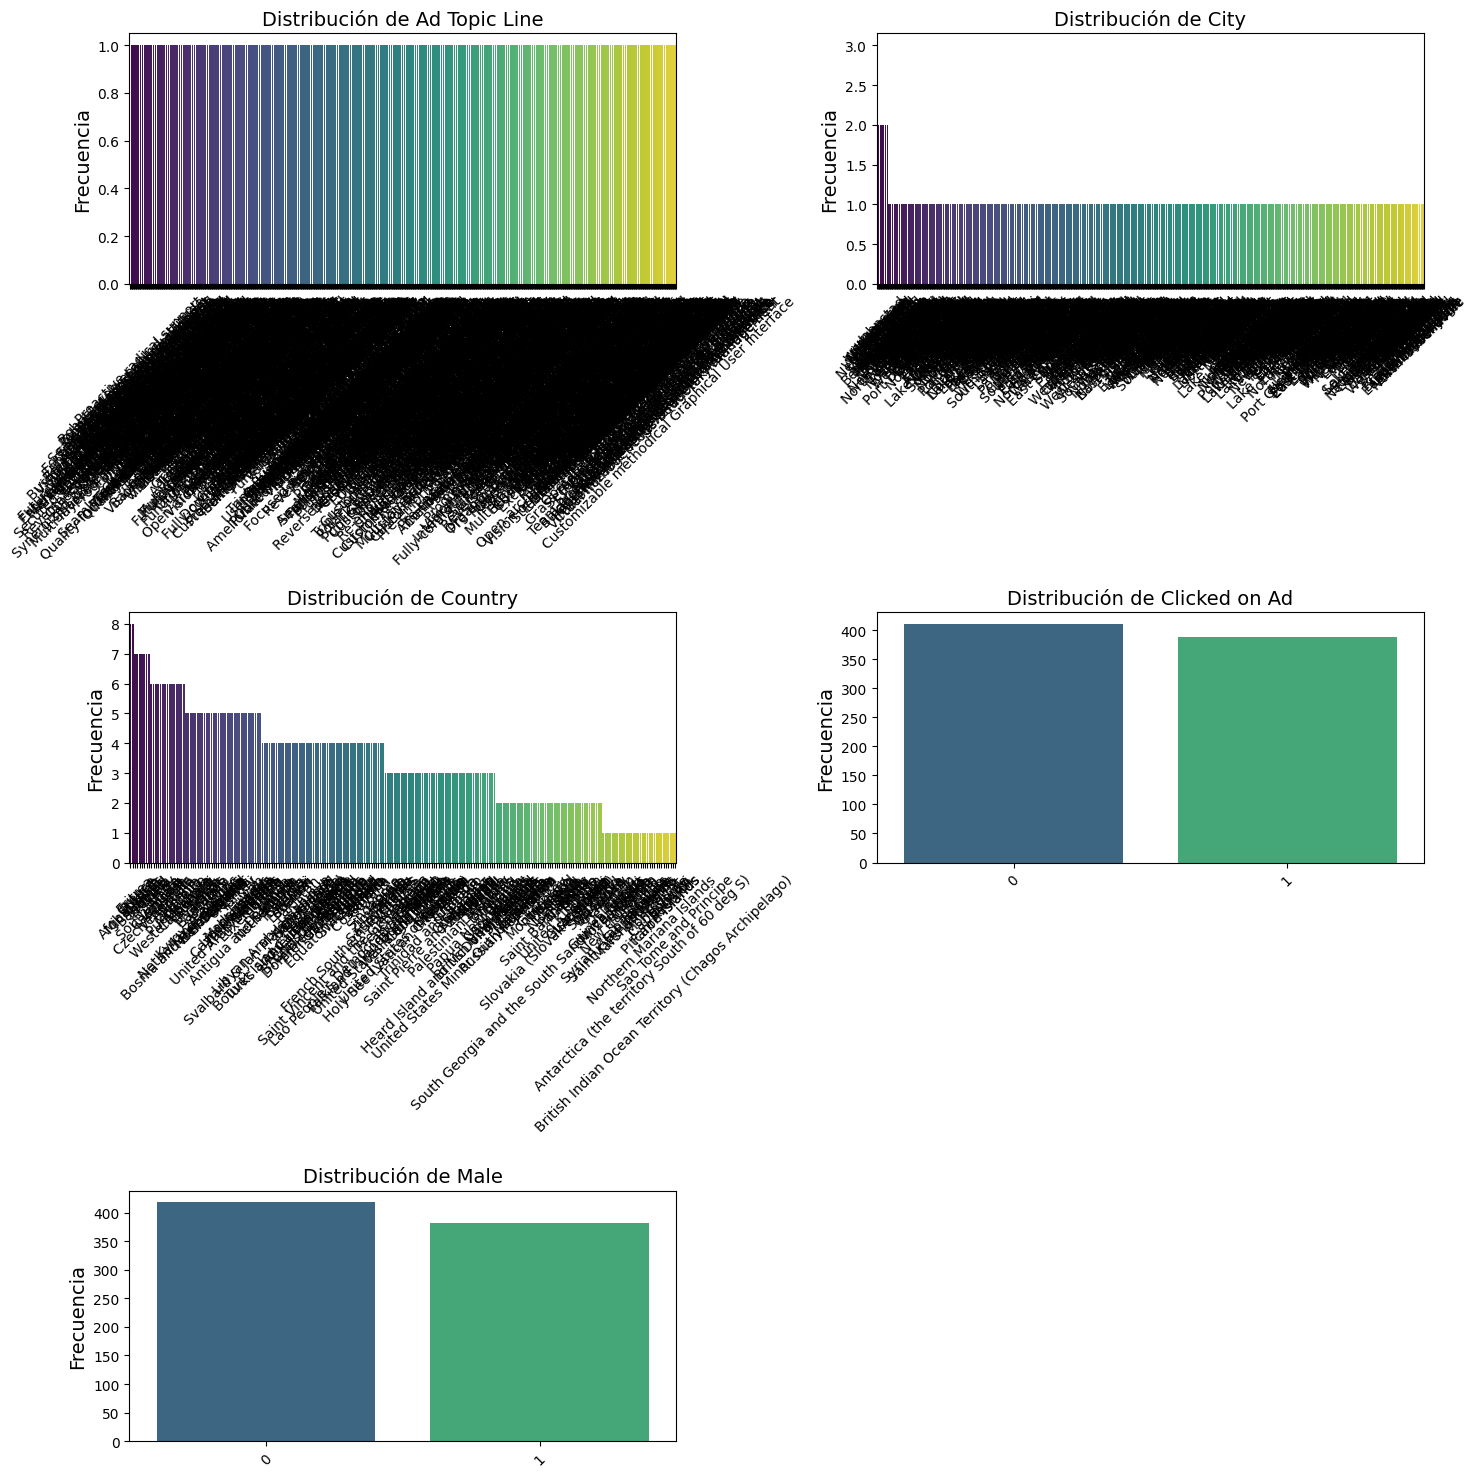

In [62]:
pinta_distribucion_categoricas(train_set, categoric_cols)

### Ejercicio 7

Muestra las correlaciones de las variables continuas con un "PairPlot" y emplea como codigo de color la variable target. [Esto es otra forma de hacer un bivariante y un multivariante a la vez]. Para ello como argumento del pairplot de seaborn usa el dataframe de train (no la matriz de correlación)

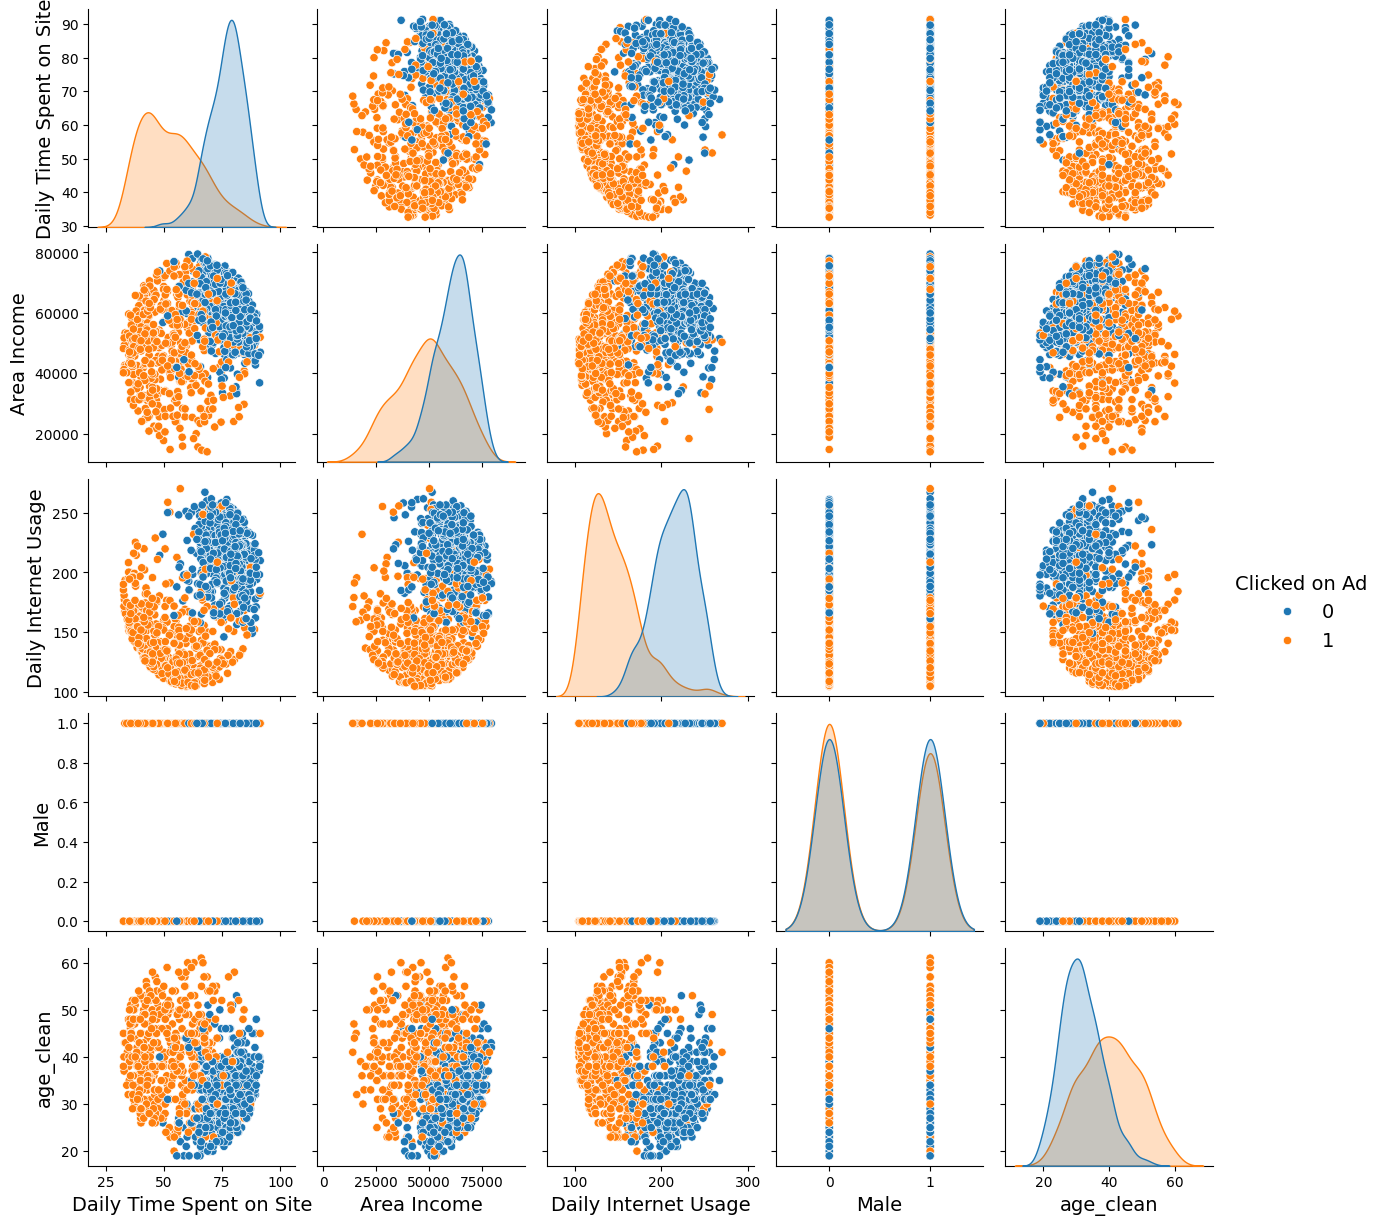

In [68]:
temp_df = train_set[numeric_cols + ['Clicked on Ad']]
sns.pairplot(adverts, hue='Clicked on Ad')

### Ejercicio 8

Fijándote en la diagonal principal del gráfico anterior haz una selecció de features:

In [ ]:
features = ['Daily Internet Usage','age_clean','Daily Time Sent On Site','Area Income']